In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time


import seaborn as sns
sns.set_style("whitegrid")

from scipy.spatial.distance import jensenshannon

import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Update data from nomis

In [2]:
df = pd.read_csv('../../data/testing/nomis/ethnicity.csv', index_col=0)

In [3]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [4]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [5]:
df = pd.DataFrame(dct, index=df.index)

In [6]:
df.to_csv('../../data/testing_del/nomis/ethnicity.csv')

# Compute values for synthetic data

In [7]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [8]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_del/{}.csv'.format(b))

    vals = [len(df)]
    for i in idx[1:]:
        vals.append(len(df[df['ethnicity'] == i]))

    dct[b] = vals

In [9]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/ciDATGAN/ethnicity.csv')

In [10]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_del/{}.csv'.format(b))

    vals = [len(df)]
    for i in idx[1:]:
        vals.append(len(df[df['ethnicity'] == i]))

    dct[b] = vals

In [11]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/DATGAN/ethnicity.csv')

In [12]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample_del/{}.csv'.format(b))

    vals = [len(df)]
    for i in idx[1:]:
        vals.append(len(df[df['ethnicity'] == i]))

    dct[b] = vals

In [13]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/oversample/ethnicity.csv')

# Compare

In [20]:
orig = pd.read_csv('../../data/testing_del/nomis/ethnicity.csv', index_col=0)

In [21]:
files = [
    '../../data/testing_del/DATGAN/ethnicity.csv',
    '../../data/testing_del/ciDATGAN/ethnicity.csv',
    '../../data/testing_del/oversample/ethnicity.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [22]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [23]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 1.07e-01 \pm 5.65e-02
ciDATGAN: 1.07e-01 \pm 2.89e-02
Oversample LTDS: 7.47e-02 \pm 3.14e-02


<AxesSubplot:>

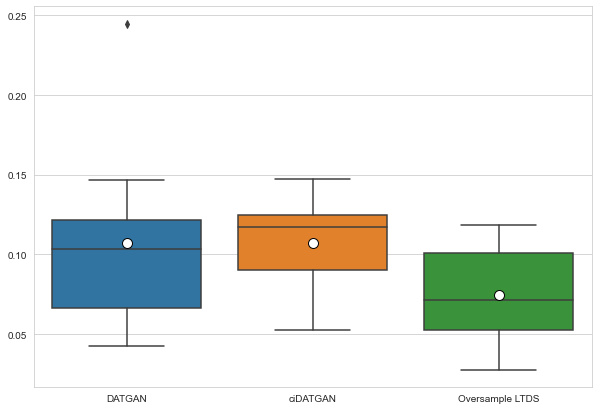

In [24]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [25]:
df

,DATGAN,ciDATGAN,Oversample LTDS
0,0.043296,0.121642,0.097032
1,0.042277,0.118473,0.068556
2,0.110020,0.100806,0.074825
3,0.125362,0.147167,0.118400
4,0.100786,0.135952,0.057565
5,0.146478,0.086787,0.032990
6,0.056674,0.125961,0.117471
7,0.094700,0.052880,0.027784
8,0.105721,0.065329,0.050690
9,0.244896,0.115497,0.102170
